In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import csv

df = pd.read_csv('dataset/myntra_fashion_clothing.csv')
df.dropna(inplace = True)
df


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188765,https://www.myntra.com/tshirts/hrx-by-hrithik-...,8379269,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women navy blue nautical...,404.0,899.0,55% OFF,"XS, S, M, L, XL",4.4,0.0
188766,https://www.myntra.com/track-pants/stylestone/...,12767048,StyleStone,Sports Wear,track-pants,Women,stylestone women black solid track pants,467.0,899.0,48% OFF,"S, M, L, XL",4.2,0.0
188767,https://www.myntra.com/tshirts/hrx-by-hrithik-...,10106141,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women black green print...,404.0,899.0,55% OFF,"S/M, L/XL",4.4,0.0
188768,https://www.myntra.com/tshirts/hrx-by-hrithik-...,11640324,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women north sea printed ...,494.0,899.0,45% OFF,"XS, S, M, L, XL",4.4,0.0


In [2]:
df.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,1.175410e+05,117541.000000,117541.000000,117541.000000,117541.000000
mean,1.322674e+07,1029.464706,2220.112172,4.075426,61.260088
std,3.285427e+06,747.469651,1562.439724,0.486669,122.937717
min,6.657800e+04,127.000000,129.000000,1.000000,0.000000
25%,1.198360e+07,584.000000,1299.000000,3.900000,8.000000
50%,1.395386e+07,824.000000,1899.000000,4.100000,19.000000
75%,1.530799e+07,1256.000000,2599.000000,4.400000,53.000000
max,1.824170e+07,16000.000000,36500.000000,5.000000,999.000000


In [3]:
df.corr()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
Product_id,1.000000,0.065719,0.086974,0.048733,-0.262191
DiscountPrice (in Rs),0.065719,1.000000,0.834355,-0.000442,-0.094479
OriginalPrice (in Rs),0.086974,0.834355,1.000000,-0.074902,-0.076077
Ratings,0.048733,-0.000442,-0.074902,1.000000,0.038234
Reviews,-0.262191,-0.094479,-0.076077,0.038234,1.000000


kaggle datasets download -d manishmathias/myntra-fashion-dataset

<AxesSubplot:>

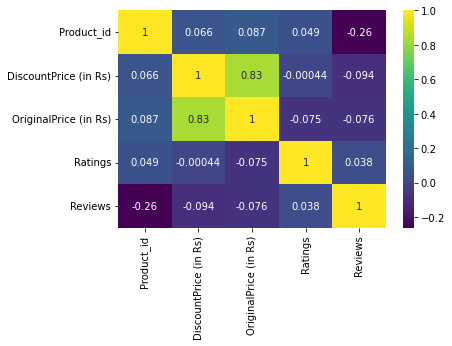

In [4]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [5]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0


In [6]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [7]:
df['DiscountOffer'] = df['DiscountOffer'].astype(str)
data_DISCOUNT = df.loc[df['DiscountOffer'].str.contains('Rs') | df['DiscountOffer'].str.contains('%')]
data_DISCOUNT

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188765,https://www.myntra.com/tshirts/hrx-by-hrithik-...,8379269,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women navy blue nautical...,404.0,899.0,55% OFF,"XS, S, M, L, XL",4.4,0.0
188766,https://www.myntra.com/track-pants/stylestone/...,12767048,StyleStone,Sports Wear,track-pants,Women,stylestone women black solid track pants,467.0,899.0,48% OFF,"S, M, L, XL",4.2,0.0
188767,https://www.myntra.com/tshirts/hrx-by-hrithik-...,10106141,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women black green print...,404.0,899.0,55% OFF,"S/M, L/XL",4.4,0.0
188768,https://www.myntra.com/tshirts/hrx-by-hrithik-...,11640324,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women north sea printed ...,494.0,899.0,45% OFF,"XS, S, M, L, XL",4.4,0.0


In [8]:
data_DISCOUNT['DiscountOffer'].values[2]
for i in range(len(data_DISCOUNT['DiscountOffer'])):
    if 'Rs' in data_DISCOUNT['DiscountOffer'].values[i]:
        arr = data_DISCOUNT['DiscountOffer'].values[i].split(" ")
        data_DISCOUNT['DiscountPrice (in Rs)'].values[i] = arr[1]
    elif '%' in data_DISCOUNT['DiscountOffer'].values[i]:
        arr = data_DISCOUNT['DiscountOffer'].values[i].split("%")
        data_DISCOUNT['DiscountPrice (in Rs)'].values[i] = data_DISCOUNT['OriginalPrice (in Rs)'].values[i] - (int(arr[0]) * data_DISCOUNT['OriginalPrice (in Rs)'].values[i]/100)

data_DISCOUNT

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.45,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.05,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.55,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.55,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.60,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188765,https://www.myntra.com/tshirts/hrx-by-hrithik-...,8379269,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women navy blue nautical...,404.55,899.0,55% OFF,"XS, S, M, L, XL",4.4,0.0
188766,https://www.myntra.com/track-pants/stylestone/...,12767048,StyleStone,Sports Wear,track-pants,Women,stylestone women black solid track pants,467.48,899.0,48% OFF,"S, M, L, XL",4.2,0.0
188767,https://www.myntra.com/tshirts/hrx-by-hrithik-...,10106141,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women black green print...,404.55,899.0,55% OFF,"S/M, L/XL",4.4,0.0
188768,https://www.myntra.com/tshirts/hrx-by-hrithik-...,11640324,HRX by Hrithik Roshan,Sports Wear,tshirts,Women,hrx by hrithik roshan women north sea printed ...,494.45,899.0,45% OFF,"XS, S, M, L, XL",4.4,0.0


**<h2>OVERALL DISCOUNTED PERCENTAGE FOR DISCOUNTED ITEMS</h2>**

In [15]:
discount_sum = data_DISCOUNT['DiscountPrice (in Rs)'].sum()
orig_price_sum = data_DISCOUNT['OriginalPrice (in Rs)'].sum()
discount_percent = 100 * (orig_price_sum - discount_sum)/orig_price_sum
np.round(discount_percent, decimals = 2)

53.48

<font size='7'>**ITEMS PER CATEGORY**</font>

In [18]:
df.groupby('Category').size()

Category
Bottom Wear                 22091
Indian Wear                 29499
Inner Wear &  Sleep Wear     6425
Lingerie & Sleep Wear       18685
Plus Size                   10020
Sports Wear                  9579
Topwear                     21232
Western                        10
dtype: int64

df.drop(columns = ['URL', 'Product_id', 'Description', 'SizeOption', 'Reviews'], inplace=True, axis=1) 

In [5]:
df.groupby(['category_by_Gender']).count()

,Product_id,BrandName,Category,Individual_category,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,Ratings
category_by_Gender,,,,,,,,
Men,62219,62219,62219,62219,62219,62219,62219,62219
Women,55322,55322,55322,55322,55322,55322,55322,55322


In [6]:
df.sort_values(by=['Ratings'])

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,Ratings
183536,10605726,Wintage,Topwear,blazers,Men,2719.0,3999.0,32% OFF,1.0
180822,16311052,Mitera,Indian Wear,sarees,Women,1382.0,5529.0,75% OFF,1.0
185515,12276230,The Indian Garage Co,Bottom Wear,jeans,Men,819.0,1999.0,59% OFF,1.0
185511,2253572,Park Avenue,Bottom Wear,trousers,Men,1839.0,2299.0,20% OFF,1.0
185509,16270942,Aeropostale,Bottom Wear,trousers,Men,1379.0,2299.0,40% OFF,1.0
...,...,...,...,...,...,...,...,...,...
169701,15938746,HERE&NOW,Lingerie & Sleep Wear,nightdress,Women,489.0,1399.0,65% OFF,5.0
171058,15183008,plusS,Plus Size,jackets,Women,2400.0,4800.0,50% OFF,5.0
184346,16721762,MYLO ESSENTIALS,Lingerie & Sleep Wear,bra,Women,479.0,599.0,20% OFF,5.0
145961,13869554,Ode by House of Pataudi,Indian Wear,kurtas,Men,524.0,1499.0,65% OFF,5.0


In [21]:
ratings = df.groupby(pd.cut(df["Ratings"], np.arange(0, 6, 1))).sum()
ratings

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings
Ratings,,,,
"(0, 1]",2627985662,275758.0,6.099820e+05,195.0
"(1, 2]",6252144837,561806.0,1.268715e+06,837.9
"(2, 3]",55341861620,4771586.0,1.117276e+07,11199.0
"(3, 4]",562966401737,43609563.0,9.896924e+07,162420.2
"(4, 5]",927495534859,71785598.0,1.489335e+08,304377.5


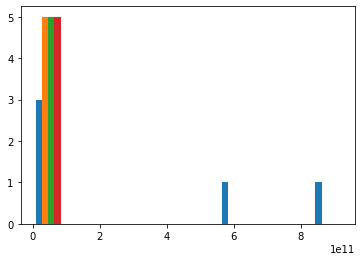

In [22]:
val = ratings.to_numpy()
plt.hist(val)
plt.show()

In [23]:
df['OriginalPrice (in Rs)'].mode()


0    1999.0
dtype: float64

In [34]:
df['DiscountPrice (in Rs)'].sum()

121004311.0

In [24]:
discount_ratio = (df['OriginalPrice (in Rs)'].sum() - df['DiscountPrice (in Rs)'].sum())/df['OriginalPrice (in Rs)'].sum()
discount_ratio

0.5363005891909238

In [25]:
total_percent_discount = discount_ratio * 100
np.round(total_percent_discount, decimals=2)

53.63

In [26]:
brand = []
for i in df['BrandName']:
    if i not in brand:
        brand.append(i)
len(brand)

1252

In [48]:
category = []
for i in df['Category']:
    if i not in category:
        category.append(i)
#category = np.array(category)
category

['Bottom Wear',
 'Topwear',
 'Lingerie & Sleep Wear',
 'Sports Wear',
 'Indian Wear',
 'Plus Size',
 'Inner Wear &  Sleep Wear',
 'Western']

In [47]:
df.groupby(['Category', 'category_by_Gender']).count()

Product_id  BrandName  \
Category                 category_by_Gender                          
Bottom Wear              Men                      22091      22091   
Indian Wear              Men                       6622       6622   
                         Women                    22877      22877   
Inner Wear &  Sleep Wear Men                       6425       6425   
Lingerie & Sleep Wear    Women                    18685      18685   
Plus Size                Men                       1047       1047   
                         Women                     8973       8973   
Sports Wear              Men                       4802       4802   
                         Women                     4777       4777   
Topwear                  Men                      21232      21232   
Western                  Women                       10         10   

                                             Individual_category  \
Category                 category_by_Gender                        
Bottom Wear              Men                               22091   
Indian Wear              Men                                6622   
                         Women                             22877   
Inner Wear &  Sleep Wear Men                                6425   
Lingerie & Sleep Wear    Women                             18685   
Plus Size                Men                                1047   
                         Women                              8973   
Sports Wear              Men                                4802   
                         Women                              4777   
Topwear                  Men                               21232   
Western                  Women                                10   

                                             DiscountPrice (in Rs)  \
Category                 category_by_Gender                          
Bottom Wear              Men                                 22091   
Indian Wear              Men                                  6622   
                         Women                               22877   
Inner Wear &  Sleep Wear Men                                  6425   
Lingerie & Sleep Wear    Women                               18685   
Plus Size                Men                                  1047   
                         Women                                8973   
Sports Wear              Men                                  4802   
                         Women                                4777   
Topwear                  Men                                 21232   
Western                  Women                                  10   

                                             OriginalPrice (in Rs)  \
Category                 category_by_Gender                          
Bottom Wear              Men                                 22091   
Indian Wear              Men                                  6622   
                         Women                               22877   
Inner Wear &  Sleep Wear Men                                  6425   
Lingerie & Sleep Wear    Women                               18685   
Plus Size                Men                                  1047   
                         Women                                8973   
Sports Wear              Men                                  4802   
                         Women                                4777   
Topwear                  Men                                 21232   
Western                  Women                                  10   

                                             DiscountOffer  Ratings  
Category                 category_by_Gender                          
Bottom Wear              Men                         22091    22091  
Indian Wear              Men                          6622     6622  
                         Women                       22877    22877  
Inner Wear &  Sleep Wear Men                          6425     6425  
Lingeri

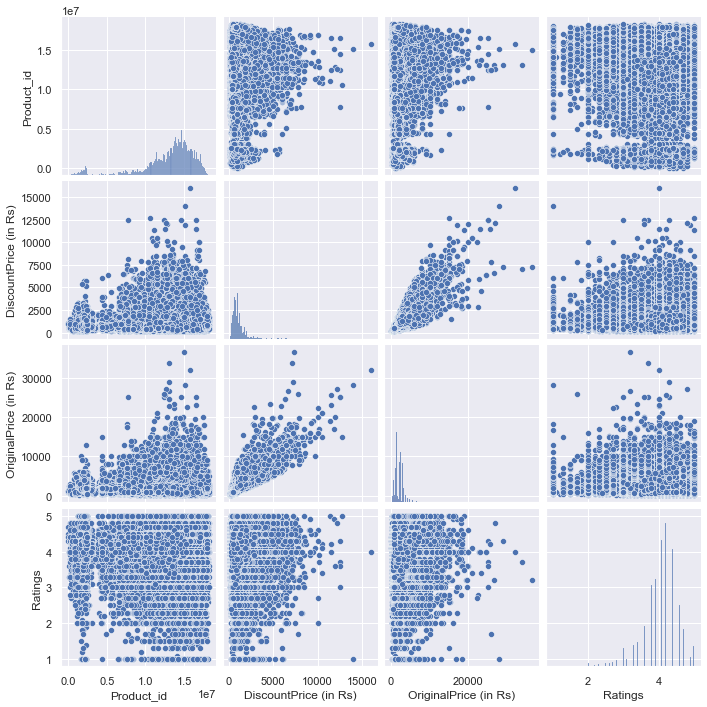

In [70]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.pairplot(df)

<AxesSubplot:xlabel='Category', ylabel='DiscountPrice (in Rs)'>

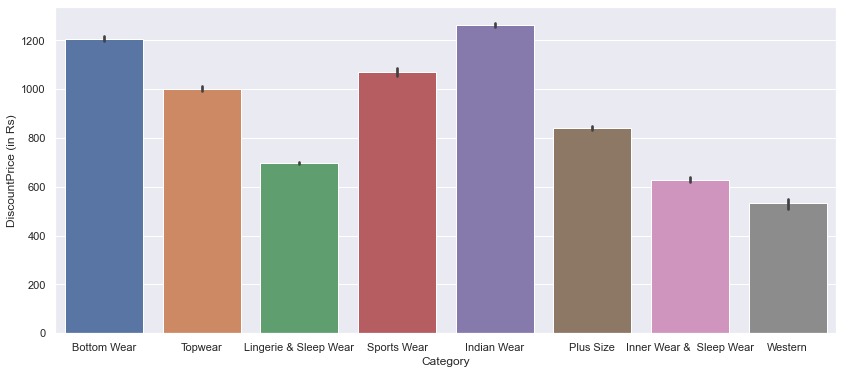

In [72]:
#sns.scatterplot(x="Category", y="DiscountPrice (in Rs)", data=df)
sns.barplot(x="Category", y="DiscountPrice (in Rs)", data=df)
sns.barplot(y = df['DiscountPrice (in Rs)'].sum(), x = df['Category'])

<AxesSubplot:xlabel='Category', ylabel='DiscountPrice (in Rs)'>

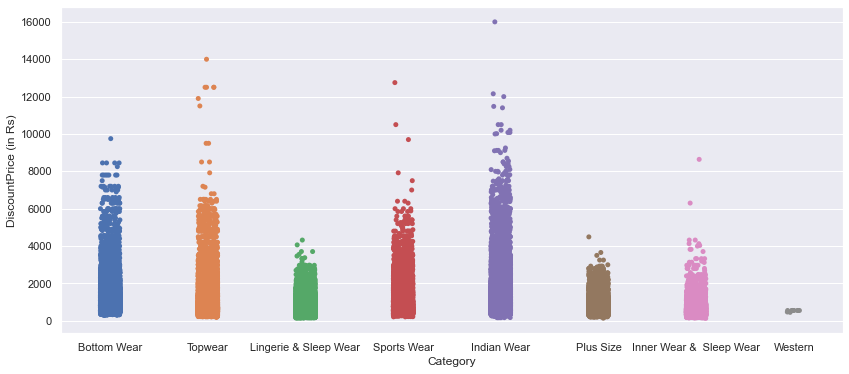

In [79]:
#sns.boxplot(y = df['DiscountPrice (in Rs)'], x = df['Category'])
#sns.violinplot(y = df['DiscountPrice (in Rs)'], x = df['Category'])
sns.stripplot(y = df['DiscountPrice (in Rs)'], x = df['Category'])

In [ ]:
sns.swarmplot(y = df['DiscountPrice (in Rs)'], x = df['Category'])

In [ ]:
sns.FacetGrid(df, col = 'Category', row = 'DiscountPrice (in Rs)').map(sns.distplot, 'Ratings')

In [28]:
df.groupby(['Category', 'category_by_Gender', 'BrandName']).count()

Product_id  Individual_category  \
Category    category_by_Gender BrandName                                       
Bottom Wear Men                3PIN                   3                    3   
                               ACTIMAXX              13                   13   
                               ACTOHOLIC              2                    2   
                               AD By Arvind           2                    2   
                               ADIDAS                80                   80   
...                                                 ...                  ...   
Topwear     Men                rock.it                5                    5   
                               t-base                66                   66   
                               zebu                   7                    7   
Western     Women              Aayna                  2                    2   
                               Kalt                   8                    8   

                                             DiscountPrice (in Rs)  \
Category    category_by_Gender BrandName                             
Bottom Wear Men                3PIN                              3   
                               ACTIMAXX                         13   
                               ACTOHOLIC                         2   
                               AD By Arvind                      2   
                               ADIDAS                           80   
...                                                            ...   
Topwear     Men                rock.it                           5   
                               t-base                           66   
                               zebu                              7   
Western     Women              Aayna                             2   
                               Kalt                              8   

                                             OriginalPrice (in Rs)  \
Category    category_by_Gender BrandName                             
Bottom Wear Men                3PIN                              3   
                               ACTIMAXX                         13   
                               ACTOHOLIC                         2   
                               AD By Arvind                      2   
                               ADIDAS                           80   
...                                                            ...   
Topwear     Men                rock.it                           5   
                               t-base                           66   
                               zebu                              7   
Western     Women              Aayna                             2   
                               Kalt                              8   

                                             DiscountOffer  Ratings  
Category    category_by_Gender BrandName                             
Bottom Wear Men                3PIN                      3        3  
                               ACTIMAXX                 13       13  
                               ACTOHOLIC                 2        2  
                               AD By Arvind              2        2  
                               ADIDAS                   80       80  
...                                                    ...      ...  
Topwear     Men                rock.it                   5        5  
                               t-base                   66       66  
                               zebu                      7        7  
Western     Women              Aayna                     2        2  
                               Kalt                      8        8  

[2274 rows x 6 columns]

In [24]:
data = df.loc[(df['Category'] == 'Bottom Wear') % (df['category_by_Gender'] == 'Men')]
data.drop(columns = ['Product_id', 'Individual_category', 'DiscountPrice (in Rs)', 'DiscountOffer', 'Ratings'], inplace=True, axis=1)
data.groupby(['BrandName']).count()

,Category,category_by_Gender,OriginalPrice (in Rs)
BrandName,,,
Roadster,117541,117541,117541


In [9]:
df = df[['BrandName', 'Individual_category', 'Ratings']]
df

,BrandName,Individual_category,Ratings
0,Roadster,jeans,3.9
1,LOCOMOTIVE,track-pants,4.0
6,HIGHLANDER,trousers,3.9
37,WROGN,jeans,4.0
38,WROGN,jeans,4.1
...,...,...,...
186570,HIGHLANDER,shorts,4.2
186571,HIGHLANDER,shorts,4.1
186572,HIGHLANDER,shorts,4.0
186573,Maniac,track-pants,3.8


In [10]:
df = df.loc[(df['Individual_category'] == 'jeans') & (df['BrandName'] == 'Roadster')]
df

,BrandName,Individual_category,Ratings
0,Roadster,jeans,3.9
46,Roadster,jeans,3.8
54,Roadster,jeans,3.7
161,Roadster,jeans,3.6
202,Roadster,jeans,3.8
...,...,...,...
186517,Roadster,jeans,4.1
186525,Roadster,jeans,3.9
186533,Roadster,jeans,3.8
186535,Roadster,jeans,3.6


In [ ]:
val = df.to_numpy()

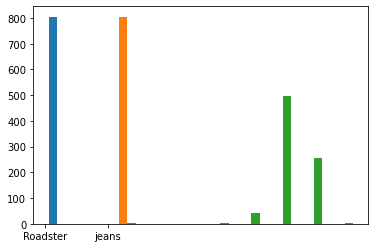

In [ ]:
plt.hist(val)
plt.show()